<a href="https://colab.research.google.com/github/cengaiyeung/20MA573/blob/master/src/hw08_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 8

Consider ODE


$$- \epsilon u^{''} + u = x, \, \forall x \in (0, 1) \, u(0) = u(1) = 0,$$

with $\epsilon = 10^{-10}$. 

Instead of FEM, we are going to discuss CFD solution of the above ODE. Answer the following questions:

1. Prove that

    $$u(x) = x - \frac{\exp (\frac{x-1}{\sqrt{\epsilon}}) - \exp (- \frac{x+1}{\sqrt{\epsilon}})}{1 - \exp(- \frac{2}{\sqrt{\epsilon}})}$$

   is the unique solution.

2. Using CFD on above ODE, find out the matrix $L^{h}$ and vector $R^{h}f$, such that the numerical solution satisfies $L^{h}u^{h} = R^{h}f$.

3. Prove the consistency and stability of $L^{h}$.

4. Compute CFD solution $u^{h}$ with $h = \frac{1}{5}$. Compare with the FEM solution of the paper, which one is better?


# 1. Pf:

(1)Want to prove $u(x)$ is the solution of $- \epsilon u^{''} + u = x, \, \forall x \in (0, 1) \, u(0) = u(1) = 0$
   
$$u'(x) = 1 - \frac{\exp (\frac{x-1}{\sqrt{\epsilon}}) \frac{1}{\sqrt{\epsilon}} - \exp (- \frac{x+1}{\sqrt{\epsilon}}) \frac{1}{\sqrt{\epsilon}}}{1 - \exp(- \frac{2}{\sqrt{\epsilon}})}$$ 
$$u''(x) = - \frac{\exp (\frac{x-1}{\sqrt{\epsilon}}) \frac{1}{\epsilon} - \exp (- \frac{x+1}{\sqrt{\epsilon}}) \frac{1}{\epsilon}}{1 - \exp(- \frac{2}{\sqrt{\epsilon}})}$$
$$-\epsilon u''(x) = \frac{\exp (\frac{x-1}{\sqrt{\epsilon}})  - \exp (- \frac{x+1}{\sqrt{\epsilon}})} {1 - \exp(- \frac{2}{\sqrt{\epsilon}})}$$
Then, we plug $u(x)$, $-\epsilon u''(x)$ into the equation, we get 
$$\frac{\exp (\frac{x-1}{\sqrt{\epsilon}})  - \exp (- \frac{x+1}{\sqrt{\epsilon}})} {1 - \exp(- \frac{2}{\sqrt{\epsilon}})} + x - \frac{\exp (\frac{x-1}{\sqrt{\epsilon}})  - \exp (- \frac{x+1}{\sqrt{\epsilon}})} {1 - \exp(- \frac{2}{\sqrt{\epsilon}})} = x$$ 

# 5. The code is below: 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl

In [5]:
e = 10**(-10)
s = 1 + 50 * e
r = 25 * e
Lh = np.array([[1, 0, 0 ,0, 0, 0], [-r, s, -r ,0, 0, 0],[0, -r, s, -r, 0, 0], [0, 0, -r, s, -r, 0],[0, 0, 0, -r, s, -r], [0, 0, 0 ,0, 0, 1]])
Rh = np.array([0, 1/5, 2/5, 3/5, 4/5, 0])
uh = sl.solve(Lh, Rh)
print(uh)

[0.  0.2 0.4 0.6 0.8 0. ]


In [0]:
def ODE_value(x,e):
  u = x - (np.exp((x-1)/np.sqrt(e)) - np.exp(-(x+1)/np.sqrt(e))) / (1 - np.exp(- 2 / np.sqrt(e)))
  return u

In [23]:
n = 5
N = n+1
u_list = np.zeros(N)
x = [0,1/5,2/5,3/5,4/5,1]
for i in range(N):
  u_list[i] = ODE_value(x[i], e)
print(u_list)

[0.  0.2 0.4 0.6 0.8 0. ]


<function matplotlib.pyplot.legend>

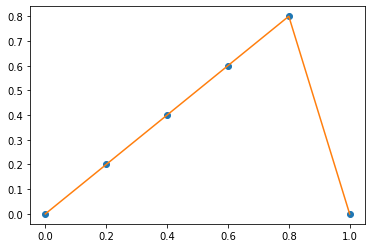

In [24]:
plt.plot(x,uh,'o',label='CFD value')
plt.plot(x,u_list,label='ODE value')
plt.legend